In [57]:
# import our usual things
%matplotlib inline
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot

# Basic Maps with cartopy

* this is grabbing a "shape" file for frequently used data
* there are a bunch of specific files you can grab here: https://github.com/nvkelso/natural-earth-vector/tree/master/zips


### Extra: more details about cartopy

In [58]:
# first, grab the file
states_file = cartopy.io.shapereader.natural_earth(resolution='110m', category='cultural',
                                    name='admin_1_states_provinces_lakes_shp')
states_file

'/Users/jillnaiman/.local/share/cartopy/shapefiles/natural_earth/cultural/ne_110m_admin_1_states_provinces_lakes_shp.shp'

In [59]:
# read the file's contents
reader = cartopy.io.shapereader.Reader(states_file)

# how we'll read the data line by line
data_line = reader.records()
# we can read each line like so
data = next(data_line)
data

<Record: <shapely.geometry.polygon.Polygon object at 0x7fa4785f2850>, {'scalerank': 2, 'featurecla': 'Admin-1 scale rank', 'adm1_code': 'USA-3514', 'diss_me': 3514, 'adm1_cod_1': 'USA-3514', 'iso_3166_2': 'US-MN', 'wikipedia': 'http://en.wikipedia.org/wiki/Minnesota', 'sr_sov_a3': 'US1', 'sr_adm0_a3': 'USA', 'iso_a2': 'US', 'adm0_sr': 1, 'admin0_lab': 2, 'name': 'Minnesota', 'name_alt': 'MN|Minn.', 'name_local': None, 'type': 'State', 'type_en': 'State', 'code_local': 'US32', 'code_hasc': 'US.MN', 'note': None, 'hasc_maybe': None, 'region': 'Midwest', 'region_cod': None, 'region_big': 'West North Central', 'big_code': None, 'provnum_ne': 0, 'gadm_level': 1, 'check_me': 10, 'scaleran_1': 2, 'datarank': 1, 'abbrev': 'Minn.', 'postal': 'MN', 'area_sqkm': 0.0, 'sameascity': -99, 'labelrank': 0, 'featurec_1': 'Admin-1 scale rank', 'admin': 'United States of America', 'name_len': 9, 'mapcolor9': 1, 'mapcolor13': 1}, <fields>>

In [60]:
# we see that we've got a lot of stuff here
#  these files can get very large and we might not want to load that all
#  into memory
#  So, we can grab individual bits of information

# define a function which returns the providence code (I think) 
regions = lambda data: data.attributes['diss_me']

# sort the by the providicence code and get the first 5
states_by_region = sorted(reader.records(), key=regions)[:5]
states_by_region

# this is a useful way to grab information from GIS

[<Record: <shapely.geometry.polygon.Polygon object at 0x7fa4586ad290>, {'scalerank': 2, 'featurecla': 'Admin-1 scale rank', 'adm1_code': 'USA-3513', 'diss_me': 3513, 'adm1_cod_1': 'USA-3513', 'iso_3166_2': 'US-MA', 'wikipedia': 'http://en.wikipedia.org/wiki/Massachusetts', 'sr_sov_a3': 'US1', 'sr_adm0_a3': 'USA', 'iso_a2': 'US', 'adm0_sr': 6, 'admin0_lab': 2, 'name': 'Massachusetts', 'name_alt': 'Commonwealth of Massachusetts|MA|Mass.', 'name_local': None, 'type': 'State', 'type_en': 'State', 'code_local': 'US25', 'code_hasc': 'US.MA', 'note': None, 'hasc_maybe': None, 'region': 'Northeast', 'region_cod': None, 'region_big': 'New England', 'big_code': None, 'provnum_ne': 0, 'gadm_level': 1, 'check_me': 0, 'scaleran_1': 2, 'datarank': 1, 'abbrev': 'Mass.', 'postal': 'MA', 'area_sqkm': 0.0, 'sameascity': -99, 'labelrank': 0, 'featurec_1': 'Admin-1 scale rank', 'admin': 'United States of America', 'name_len': 13, 'mapcolor9': 1, 'mapcolor13': 1}, <fields>>,
 <Record: <shapely.geometry.pol

### End extra

## Maps with cartopy
So the above was quite academic, but lets actually apply cartopy to plotting some maps!

Cartopy is great because it allows us to plot on maps using our old friend the `matplotlib` interface by specifying a "projection" for our subplot:

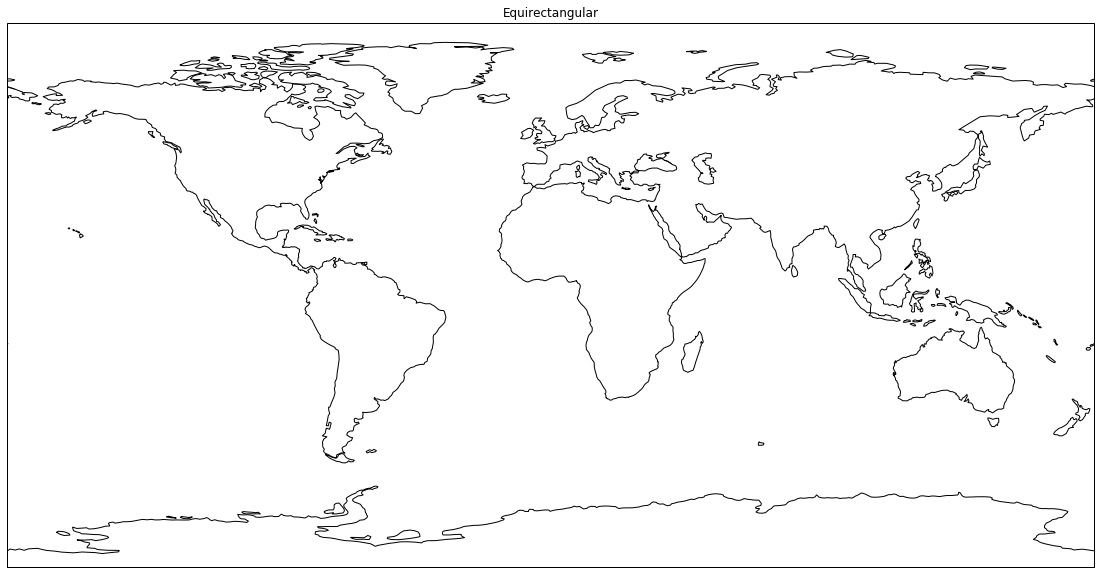

In [61]:
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': cartopy.crs.PlateCarree()})
ax.coastlines()
plt.title("Equirectangular");

Note: this is somewhat easier to specify by adding subplots "by hand":

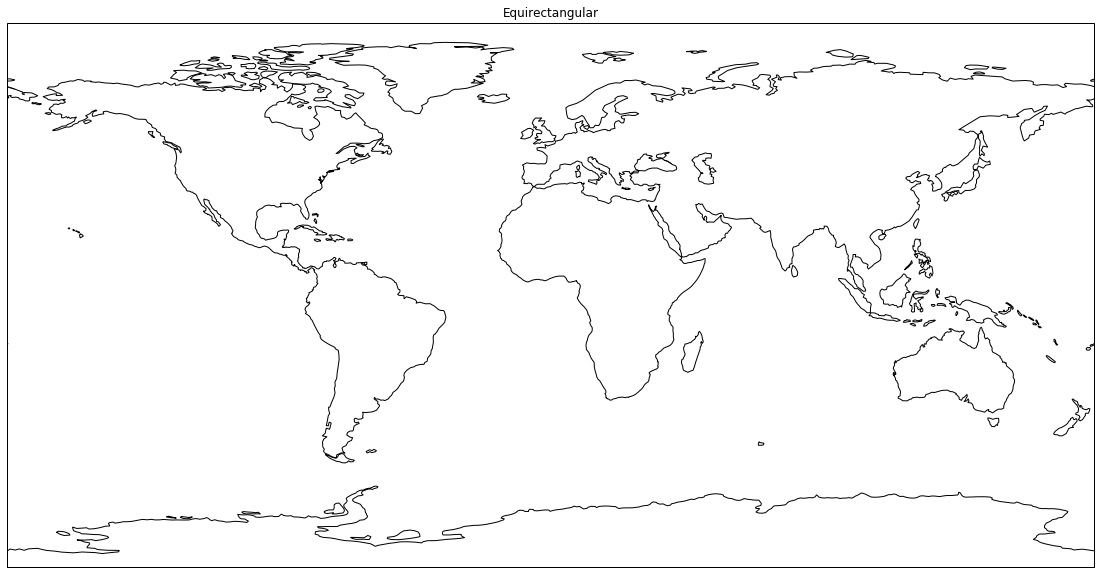

In [62]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = cartopy.crs.PlateCarree())
ax.coastlines()
plt.title("Equirectangular");

We can do other projections as well:

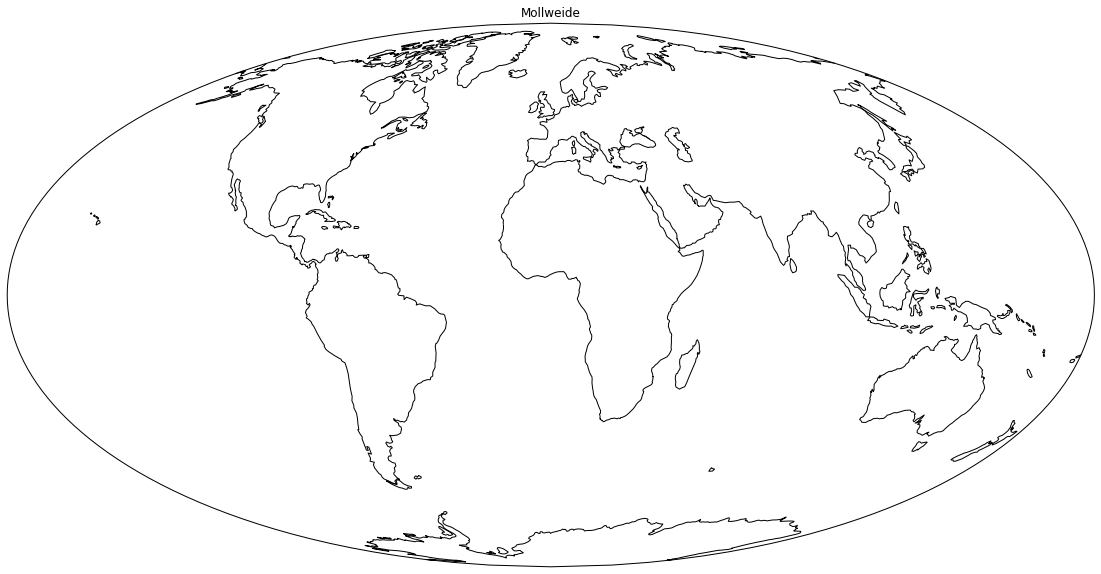

In [63]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = cartopy.crs.Mollweide())
ax.coastlines()
plt.title("Mollweide");

In [64]:
# in fact, we have a good deal of maps avaialbe to us:
cartopy.crs. # do some tab completes

SyntaxError: invalid syntax (<ipython-input-64-b525dde94669>, line 2)

## Drawing on maps
What's cool about caropy is that you can draw lines or data points exactly as you would with any matplotlib plot, but it will re-project onto the correct lat & long.  For example, lets draw some lines between points.

We'll draw lines that are straight in lat/long and then we'll also draw the path of the *shortest distance* between these two points which is actually curved on our flat map:

In [65]:
champaign_lat, champaign_lon = 40.1164, -88.2434
antananarivo_lat, antananarivo_lon = -18.8792, 47.5079 # the capital of Madagascar

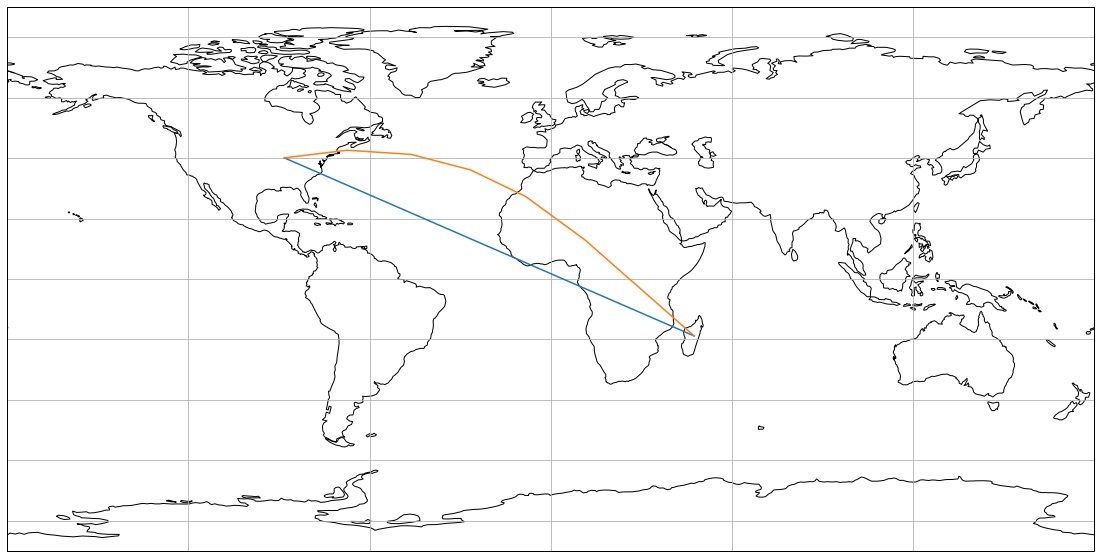

In [66]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = cartopy.crs.PlateCarree())
ax.gridlines() #lat, long marks
ax.coastlines() # show the coast
ax.set_global() # you can toggle this on or off to see it zoom

# first, lets plot the distance between 2 points along constant lat & long
ax.plot([champaign_lon, antananarivo_lon], 
        [champaign_lat, antananarivo_lat], 
        transform = cartopy.crs.PlateCarree())

# now, lets show how the actual shortest distance between these 2 points would look
ax.plot([champaign_lon, antananarivo_lon], 
        [champaign_lat, antananarivo_lat], 
        transform = cartopy.crs.Geodetic())

plt.show()

### Aside: on Mollweide plots

Lets do the same thing, but for a different projection: Mollweide

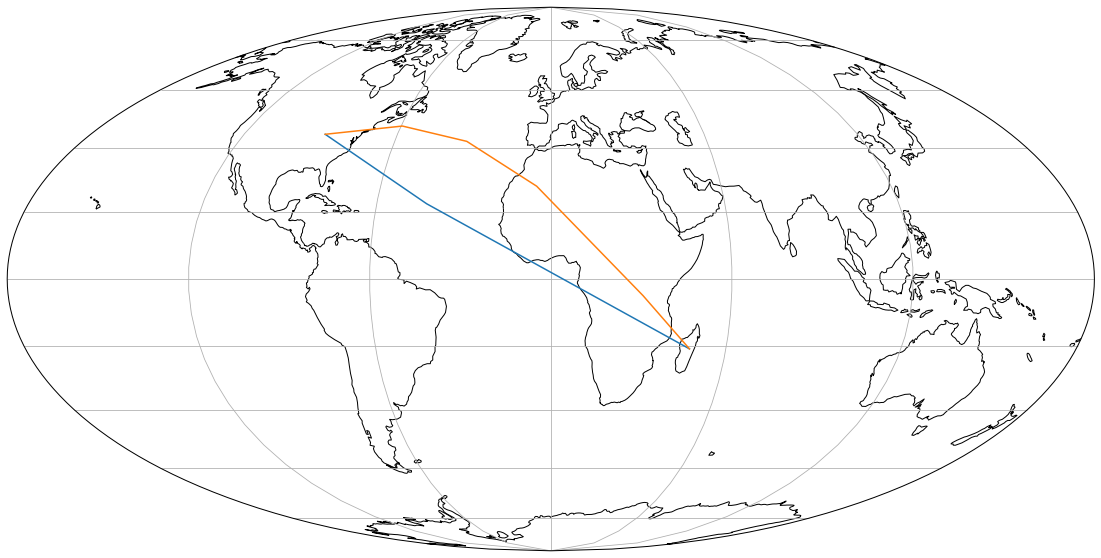

In [67]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = cartopy.crs.Mollweide())
ax.gridlines()
ax.coastlines()
ax.set_global()
# first, we'll plot the line we had on the previous plot that is a straight line
#  in terms of lat & long
ax.plot([champaign_lon, antananarivo_lon], 
        [champaign_lat, antananarivo_lat], 
        transform = cartopy.crs.PlateCarree())
# note that because the lat lines are distorted in the Mollweide projection, 
#  even this line is a little curved

# Here again is how the actual shortest distance between 2 paths looks like
ax.plot([champaign_lon, antananarivo_lon], 
        [champaign_lat, antananarivo_lat], 
        transform = cartopy.crs.Geodetic())

plt.show()

We can also easily plot points:

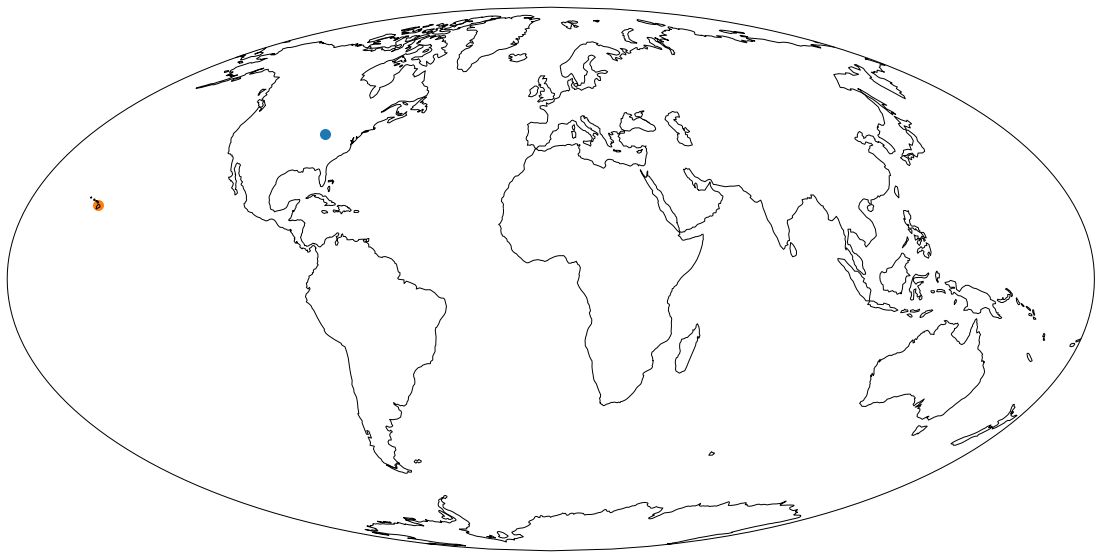

In [68]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, 
                     projection = cartopy.crs.Mollweide())
champaign = 40.1164, -88.2434
oahu = 19.8968, -155.582
ax.scatter(champaign[1], 
           champaign[0], 
           transform = cartopy.crs.PlateCarree(), 
          s=100)
ax.scatter(oahu[1], 
           oahu[0], 
           transform = cartopy.crs.PlateCarree(), 
          s=100)
ax.set_global()
ax.coastlines()
plt.show()

# Plotting earthquake sensor data on the US map with cartopy
* we'll be plotting the activity of earthquake sensors across the US in response to the 2011 earthquake in Japan
* more info can be found here: https://ds.iris.edu/ds/nodes/dmc/specialevents/2011/03/11/tohoku-japan-earthquake/
* a few cool movies based on this data & others collected & simulated about this event can be found here: http://www.seismicsoundlab.org/?page_id=338

Show this movie: https://vimeo.com/187740441 (we'll talk more about what we do and don't like about this later)

In [69]:
# using pandas to access the data per usual
import pandas as pd

Lets upload the locations of each of these sensors during the earthquake:

In [70]:
locations = pd.read_csv("/Users/jillnaiman/Downloads/location.txt", delimiter="\t",
            header = None, names = ["longitude", "latitude", "empty1", "empty2"])

In [71]:
locations

,longitude,latitude,empty1,empty2
0,-98.683,27.065,1,#
1,-98.102,26.938,1,#
2,-98.068,26.463,1,#
3,-117.110,32.889,1,#
4,-107.790,32.532,1,#
...,...,...,...,...
433,-95.623,33.198,1,#
434,-94.985,33.260,1,#
435,-94.182,33.242,1,#
436,-93.400,33.258,1,#


Now we'll do some data cleaning:

In [72]:
del locations["empty1"], locations["empty2"]

In [73]:
# we can check out how these look - lat-long pairs
locations

,longitude,latitude
0,-98.683,27.065
1,-98.102,26.938
2,-98.068,26.463
3,-117.110,32.889
4,-107.790,32.532
...,...,...
433,-95.623,33.198
434,-94.985,33.260
435,-94.182,33.242
436,-93.400,33.258


Now, lets plot them on a us map:

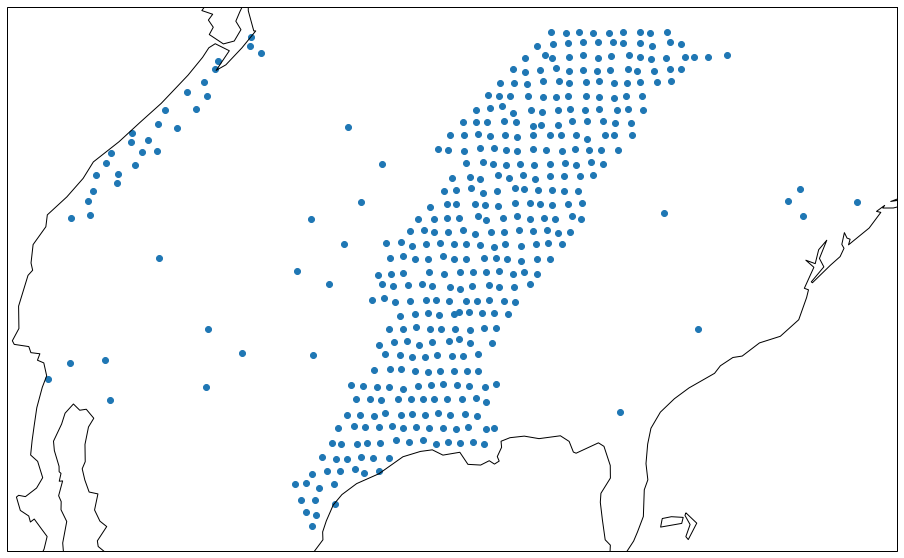

In [74]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = cartopy.crs.Mollweide())
ax.scatter(locations["longitude"], locations["latitude"], transform = cartopy.crs.PlateCarree())
#ax.set_global() # if we leave this uncommented, we don't see the detailed locations
ax.coastlines()
plt.show()

The above is using a Molloweide projection but we're used to seeing these sorts of maps of the US sort of "face on".

We can accomplish this with a different projection:

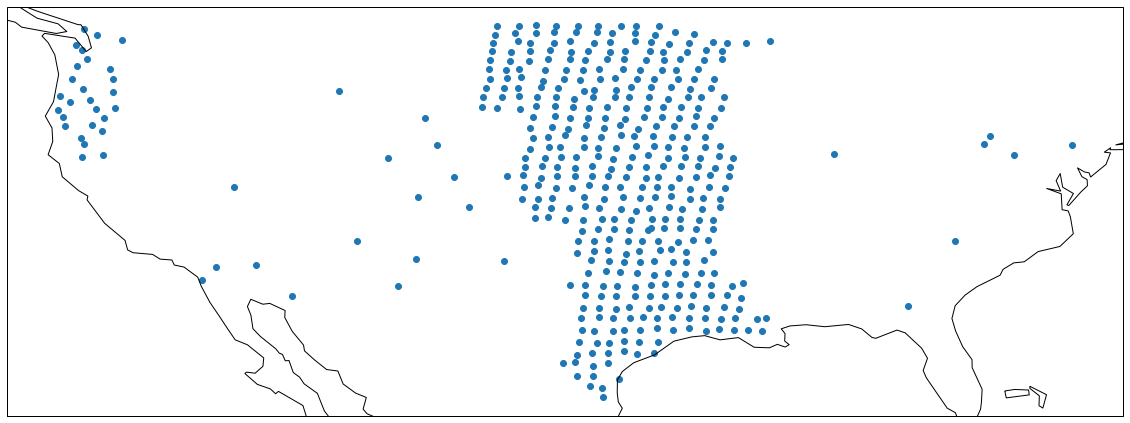

In [75]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = cartopy.crs.LambertCylindrical())
ax.scatter(locations["longitude"], locations["latitude"], transform = cartopy.crs.PlateCarree())
ax.coastlines()
plt.show()

Ok, lets start thinking about how to link this data to the actual readings of each detector.  First, lets read in the detector data:

In [76]:
seismic = pd.read_csv("/Users/jillnaiman/Downloads/data_tohoku_norm_transpose.csv",
           header = None)

In [77]:
# what is the shape of this data vs the location data?
seismic.shape, locations.shape

((14401, 438), (438, 2))

So, this is telling us
 1. that there are 438 stations in total
 1. what about 14401?  this is the length of time in seconds that each detector recorded

In [78]:
14401/(60*60)
# so about 4 hours worth of data in 
#  second increments

4.000277777777778

Lets check out this seismic data with a widget

In [79]:
import ipywidgets
@ipywidgets.interact(station = (0, 437))
def plot(station = 0):
    plt.plot(seismic[station])
    plt.xlabel("Time in sec")
    # note: this is normalized to peak amplitude for this event
    #  so, in essence, unitless
    plt.ylabel("Normalized Displacement") 
    plt.ylim(-1, 1)
    
# the above allows us to see how each detector reacted to
#  this earthquake

interactive(children=(IntSlider(value=0, description='station', max=437), Output()), _dom_classes=('widget-int…

In [80]:
# one thing you might notice depending on your computer's age
# is that this can get a little laggy
#  ultimately, we want to use the full dataset
#  but for the purposes of doing things now, or debugging at home
#  lets use a downsampled dataset

# recall our origional sizes
seismic.shape, locations.shape

((14401, 438), (438, 2))

In [81]:
# we have 3 options: we can decrese the number of stations, 
#  or the number of time samples, or both
# for illustration purposes, lets do both

nstations = 300 # downsample to 300
ntimes = 1440 # factor of 10

import numpy as np
stationsIndex = np.random.choice(range(locations.shape[0]-1), 
                                  nstations, replace=False)
timesIndex = np.random.choice(range(seismic.shape[0]-1), 
                                  ntimes, replace=False)

# sort each
stationsIndex.sort()
timesIndex.sort()

In [82]:
locations2 = locations.loc[stationsIndex]
seismic2 = seismic.loc[timesIndex,stationsIndex]
seismic2.shape, locations2.shape
# sweet

((1440, 300), (300, 2))

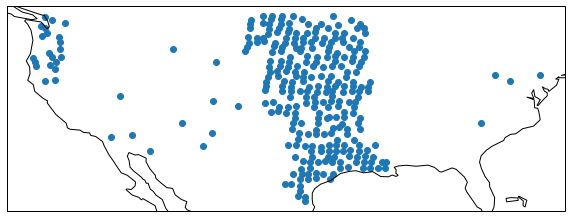

In [83]:
# lets real quick redo our plots and take a look
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, 
                     projection = cartopy.crs.LambertCylindrical())
ax.scatter(locations2["longitude"], locations2["latitude"], 
           transform = cartopy.crs.PlateCarree())
ax.coastlines()

In [84]:
# and redo our widget
import ipywidgets
@ipywidgets.interact(station = (0,nstations-1))
def plot(station = 0):
    plt.plot(seismic2.iloc[:,station])
    plt.xlabel("Time in sec")
    # note: this is normalized to peak amplitude for this event
    #  so, in essence, unitless
    plt.ylabel("Normalized Displacement") 
    plt.ylim(-1, 1)

interactive(children=(IntSlider(value=0, description='station', max=299), Output()), _dom_classes=('widget-int…

In [85]:
# note, we can also do the above plot with bqplot as well:
import bqplot

# scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# marks
lines = bqplot.Lines(x = seismic2.index.values, 
                     y = seismic2.iloc[:,0],
                    scales = {'x': x_sc, 'y': y_sc})

# axes
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, orientation = 'vertical')

# combine into figure
fig = bqplot.Figure(marks = [lines], axes = [x_ax, y_ax])

# create our slider using ipywidgets
slider = ipywidgets.IntSlider(min=0, max=nstations-1)
y_sc.min = -1.0
y_sc.max = 1.0

# create a linking function for slider & plot
def update_slider(event):
    lines.y = seismic2.iloc[:,event['new']]

slider.observe(update_slider, 'value')

display(ipywidgets.VBox([slider, fig]))

# note that this is much more responsive now
#  than we we did this ourselves
# bqplots ftw

In [86]:
# ok, so we are now super into linking THING A with THING B
#  so lets link our sesmic data with its location on the map
#  we can do this with cartopy & matplotlib

@ipywidgets.interact(station = (0, nstations, 1), 
                     t = (0, ntimes, 1))
def plot(station = 0, t = 0):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(211, 
                         projection = cartopy.crs.LambertCylindrical())
    colors = seismic2.iloc[t]
    ax.scatter(locations2["longitude"], 
               locations2["latitude"], 
               transform = cartopy.crs.PlateCarree(),
               c = colors)
    ax.coastlines()

    ax = fig.add_subplot(212)
    ax.plot(seismic2.index.values, seismic2.iloc[:,station])
    ax.set_ylim(-1, 1)

interactive(children=(IntSlider(value=0, description='station', max=300), IntSlider(value=0, description='t', …

# Activity #3: Info viz maps with bqplot

In [87]:
# with bqplot

map_mark = bqplot.Map(scales={'projection': bqplot.AlbersUSA()})
fig = bqplot.Figure(marks=[map_mark], title='Basic Map Example')
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Map(hovered_styles={'hovered_fill…

In [88]:
# can make a statemap instead
#(1)
sc_geo = bqplot.AlbersUSA()
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# (2) 
def_tt = bqplot.Tooltip(fields=['id', 'name'])

states_map = bqplot.Map(map_data=state_data, 
                        scales={'projection':sc_geo}, 
                        tooltip=def_tt)

# (2) grab interactions
states_map.interactions = {'click': 'select', 'hover': 'tooltip'}

# (3) grab data directly from map
# we could also grab from the state_data itself
from states_utils import get_ids_and_names
ids, state_names = get_ids_and_names(states_map)


# lets make into arrays for ease
#state_names =np.array(state_names)
#ids = np.array(ids)
state_names, ids
# into arrays


# (4) data
def get_data_value(change):
    if change['owner'].selected is not None:
        for i,s in enumerate(change['owner'].selected):
            print(state_names[s == ids])
        
states_map.observe(get_data_value,'selected')

# (1)
fig=bqplot.Figure(marks=[states_map], 
                  title='US States Map Example',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}) # try w/o first and see
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

## Adding in some data to link to our usa map

In [89]:
# lets add in some exprot data
comm = pd.read_csv('/Users/jillnaiman/Downloads/total_export.csv')

In [90]:
comm.loc[comm['State'] == 'Alabama'].values
# we note that these are formatted as strings - this means we'll have to 
#  do some formatting when we plot data

# also, note that the state name is the first column and not a number
# we'll also have to take care of this too

array([['Alabama', '574.6', '673.2', '530.0', '719.5', '724.4', '771.5',
        '695.6', '839.7', '1,050.4', '1,040.7', '1,131.7', '1,405.0',
        '1,469.6', '1,587.3', '1,510.1', '1,199.1', '1,207.6', '1,271.9']],
      dtype=object)

In [91]:
# grab years
years = list(comm.columns.values)
years = np.array(years[1:]) # get rid of state
# as numbers
years = years.astype('int')
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [92]:
sc_geo = bqplot.AlbersUSA()
state_data = bqplot.topo_load('map_data/USStatesMap.json')

def_tt = bqplot.Tooltip(fields=['id', 'name'])

states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, tooltip=def_tt)
states_map.interactions = {'click': 'select', 'hover': 'tooltip'}

fig=bqplot.Figure(marks=[states_map], title='US States Map Example',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})


# lets also make a line plot
# second, the lineplot
x_scl = bqplot.LinearScale() 
y_scl = bqplot.LinearScale()
ax_xcl = bqplot.Axis(label='Year', scale=x_scl)
ax_ycl = bqplot.Axis(label='Total Export from State NA', 
                     scale=y_scl, 
                    orientation='vertical', side='left')
lines = bqplot.Lines(x = years, y = np.zeros(len(years)),
                    scales = {'x': x_scl, 'y': y_scl})
#print(lines)
fig_lines = bqplot.Figure(marks = [lines], 
                          axes = [ax_ycl, ax_xcl],)

# let do something additive for all states selected
def get_data_value(change):
    exports = np.zeros(len(years))
    snames = ''
    if change['owner'].selected is not None:
        for i,s in enumerate(change['owner'].selected):
            sn = state_names[s == ids][0]
            snames += sn + ', '
            # because of formatting, things are in arrays hence [0]
            #  also, take out state name hence [1:]
            exports_in=comm.loc[comm['State'] == sn].values[0][1:]
            # there are ","'s in exports we gotta take out
            exports_in = np.array([exports_in[i].replace(',','') for i in range(len(exports_in))])
            exports = np.add(exports, exports_in.astype('float64'))
        lines.y = exports
        ax_ycl.label='Total Export from ' + snames
    else:
        lines.y = np.zeros(len(exports))
        ax_ycl.label='Total Export from NA'

states_map.observe(get_data_value,'selected')

# some formatting for vertical
#fig_lines.layout.max_height='250px'
#fig_lines.layout.min_width='800px'
#fig.layout.min_width='800px'
#ipywidgets.VBox([fig_lines,fig])
ipywidgets.HBox([fig,fig_lines])

# Activity:

Using the tools and resources we talked about today - create a map with at least 2 layers

Bonus: make it interactive and part of a dashboard!